In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# I splitted the data to 5 million rows for users and games and 2000 rows of reocmmendations


In [2]:

recommendations_df = pd.read_csv('data/downsized/recommendations.csv')

## Explore Recommendations

In [3]:
recommendations_df.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,304390,4,0,2017-02-17,False,11.5,2586,1
1,703080,0,0,2022-09-23,True,27.4,259432,3
2,526870,0,0,2021-01-10,True,7.9,23869,4
3,306130,0,0,2021-10-10,True,8.6,45425,5
4,730,0,0,2021-11-30,False,157.5,63209,7


In [4]:
recommendations_df.columns

Index(['app_id', 'helpful', 'funny', 'date', 'is_recommended', 'hours',
       'user_id', 'review_id'],
      dtype='object')

In [5]:
recommendations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000000 entries, 0 to 8999999
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 489.2+ MB


In [6]:
# Index(['app_id', 'helpful', 'funny', 'date', 'is_recommended', 'hours',
    #    'user_id', 'review_id'],

HELPFUL = 'helpful'
FUNNY = 'funny'
DATE = 'date'
IS_RECOMMENDED = 'is_recommended'
HOURS = 'hours'
USER_ID = 'user_id'
REVIEW_ID = 'review_id'


# Checking for the ranges and the distribution of the relevant data
recommendations_df.loc[:, [HELPFUL, FUNNY, HOURS, DATE]].describe()

,helpful,funny,hours
count,9.000000e+06,9.000000e+06,9.000000e+06
mean,3.671115e+00,1.246652e+00,1.440662e+02
std,6.120867e+01,3.937323e+01,2.071206e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.590000e+01
50%,0.000000e+00,0.000000e+00,5.270000e+01
75%,0.000000e+00,0.000000e+00,1.740000e+02
max,3.621200e+04,2.367400e+04,9.999000e+02


In [7]:
recommendations_df.loc[:, [HELPFUL, FUNNY, HOURS, DATE]].mask(recommendations_df == 0).describe()

,helpful,funny,hours
count,1.902239e+06,513004.000000,8.999454e+06
mean,1.736902e+01,21.870917,1.440750e+02
std,1.322414e+02,163.542539,2.071238e+02
min,2.000000e+00,2.000000,1.000000e-01
25%,2.000000e+00,2.000000,1.590000e+01
50%,3.000000e+00,3.000000,5.270000e+01
75%,7.000000e+00,8.000000,1.740000e+02
max,3.621200e+04,23674.000000,9.999000e+02


Text(0.5, 1.0, 'Number of recommendations added per day')

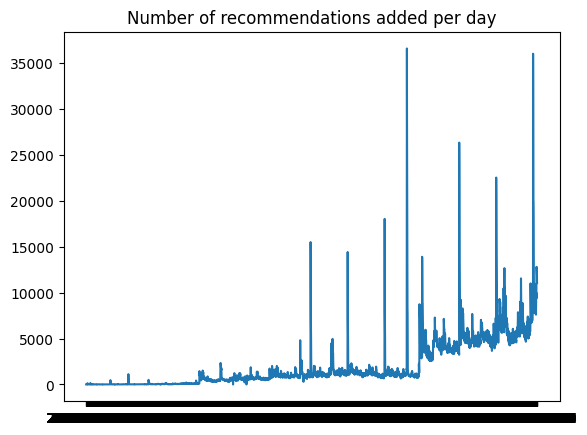

In [8]:

import matplotlib.pyplot as plt
# plot the distribution of count and dates.
ADDED_RECS = recommendations_df[DATE].value_counts()
# print(ADDED_RECS.sort_index())
plt.plot(ADDED_RECS.sort_index())
plt.title('Number of recommendations added per day')


In [9]:
df_added = pd.DataFrame(ADDED_RECS)
df_added.reset_index(inplace=True)
df_added.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4439 entries, 0 to 4438
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    4439 non-null   object
 1   count   4439 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 69.5+ KB


In [10]:
# Regplot
df_added[DATE] = pd.to_datetime(df_added[DATE])


In [11]:
df_added.head()

,date,count
0,2019-06-29,36561
1,2022-11-22,35988
2,2022-11-23,32764
3,2019-06-30,29682
4,2020-11-25,26315


<Axes: xlabel='year', ylabel='month'>

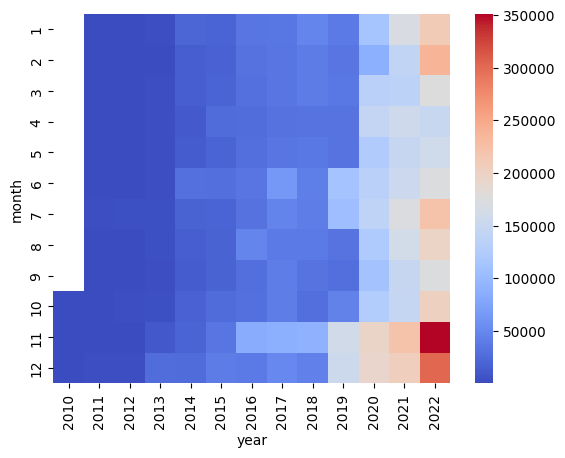

In [12]:
# Plot a heatmap of the months as Y and X as years of the count of reviews
recommendations_df[DATE] = pd.to_datetime(recommendations_df[DATE])
recommendations_df['year'] = recommendations_df[DATE].dt.year
recommendations_df['month'] = recommendations_df[DATE].dt.month
recommendations_df['day'] = recommendations_df[DATE].dt.day
recommendations_df['dayofweek'] = recommendations_df[DATE].dt.dayofweek
recommendations_df['dayofyear'] = recommendations_df[DATE].dt.dayofyear

# print(recommendations_df.head()) 
sns.heatmap(recommendations_df.pivot_table(index='month', columns='year', values='review_id', aggfunc='count'), cmap='coolwarm')

<Axes: xlabel='dayofweek', ylabel='month'>

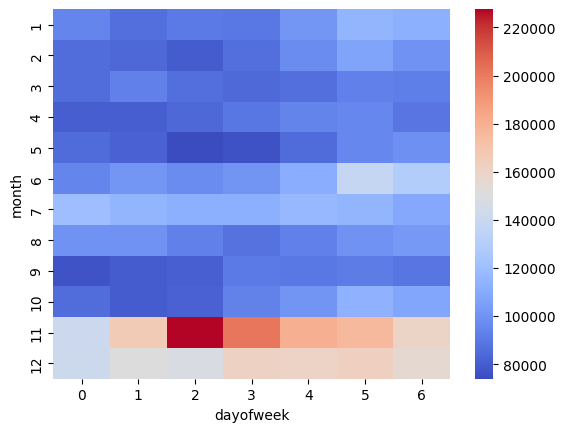

In [13]:
# sns.heatmap(recommendations_df.pivot_table(index='month', columns='year', values='review_id', aggfunc='count'), cmap='coolwarm')
sns.heatmap(recommendations_df.pivot_table(index='month', columns='dayofweek', values='review_id', aggfunc='count'), cmap='coolwarm')

<Axes: xlabel='day', ylabel='month'>

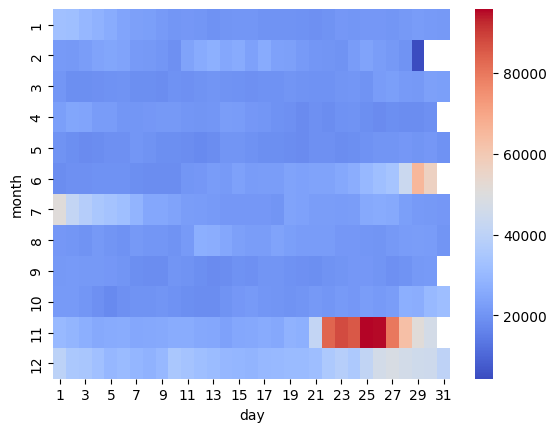

In [14]:
sns.heatmap(recommendations_df.pivot_table(index='month', columns='day', values='review_id', aggfunc='count'), cmap='coolwarm')

In [15]:
# Mean, min, max, median, quartiles
numerical_features_recommendation = [HELPFUL, FUNNY, HOURS, DATE, HOURS]
print(recommendations_df[numerical_features_recommendation].describe())

            helpful         funny         hours  \
count  9.000000e+06  9.000000e+06  9.000000e+06   
mean   3.671115e+00  1.246652e+00  1.440662e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  1.590000e+01   
50%    0.000000e+00  0.000000e+00  5.270000e+01   
75%    0.000000e+00  0.000000e+00  1.740000e+02   
max    3.621200e+04  2.367400e+04  9.999000e+02   
std    6.120867e+01  3.937323e+01  2.071206e+02   

                                date         hours  
count                        9000000  9.000000e+06  
mean   2020-05-22 09:39:30.844797184  1.440662e+02  
min              2010-10-15 00:00:00  0.000000e+00  
25%              2019-06-18 00:00:00  1.590000e+01  
50%              2021-01-02 00:00:00  5.270000e+01  
75%              2022-02-12 00:00:00  1.740000e+02  
max              2022-12-31 00:00:00  9.999000e+02  
std                              NaN  2.071206e+02  


In [16]:
recommendations_df[numerical_features_recommendation].corr()

,helpful,funny,hours,date,hours
helpful,1.000000,0.443884,0.007385,-0.020669,0.007385
funny,0.443884,1.000000,0.005857,-0.019784,0.005857
hours,0.007385,0.005857,1.000000,-0.098345,1.000000
date,-0.020669,-0.019784,-0.098345,1.000000,-0.098345
hours,0.007385,0.005857,1.000000,-0.098345,1.000000


<Axes: >

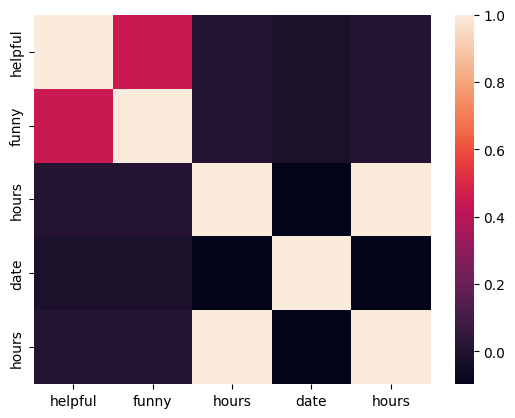

In [17]:
sns.heatmap(recommendations_df[numerical_features_recommendation].corr())

<Axes: >

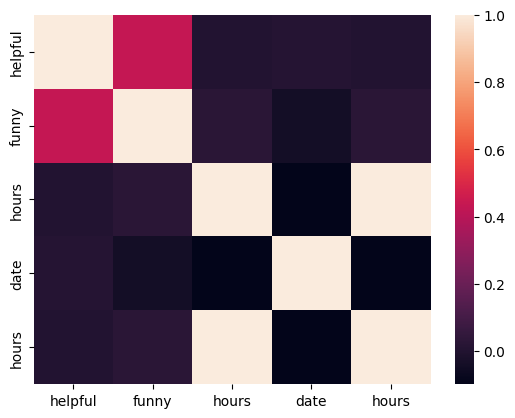

In [18]:
masked_continuous_features = recommendations_df[numerical_features_recommendation].mask(recommendations_df == 0)
sns.heatmap(masked_continuous_features.corr())

In [19]:
masked_continuous_features.corr()

,helpful,funny,hours,date,hours
helpful,1.000000,0.429577,0.004367,0.008995,0.004367
funny,0.429577,1.000000,0.024790,-0.039450,0.024790
hours,0.004367,0.024790,1.000000,-0.098427,1.000000
date,0.008995,-0.039450,-0.098427,1.000000,-0.098427
hours,0.004367,0.024790,1.000000,-0.098427,1.000000


In [20]:
# Plot correlation
def defineCategory(hours):
    if hours > 50:
        return "> 50 hours"
    elif hours > 20:
        return "> 20 hours"
    elif hours > 1:
        return "> 1 hours"
    return "< 1 hours"


recommendations_df['hours_cat'] = recommendations_df[HOURS].apply(defineCategory)

<Axes: xlabel='funny', ylabel='helpful'>

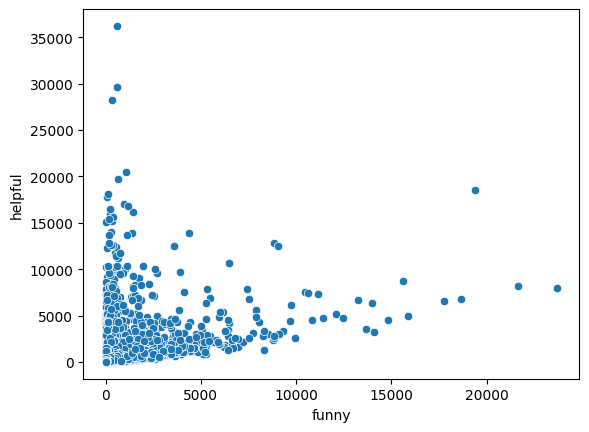

In [21]:
# Plot relationship `funny` and `helpful`

sns.scatterplot(recommendations_df, x=FUNNY, y=HELPFUL)

In [22]:
# sns.regplot(recommendations_df, x=FUNNY, y=HELPFUL, line_kws={'color': 'black'})